In [6]:
import numpy as np
import inspect
import matplotlib.pyplot as plt
from utils.shabanipy.labber import LabberData
import utils.fluxonium_functions as ff
from utils.jy_mpl_settings.settings import jy_mpl_rc
from utils.jy_mpl_settings.colors import line_colors
plt.style.use(jy_mpl_rc)
import scqubits as scq
plt.rcParams["font.family"] = "DejaVu Sans"

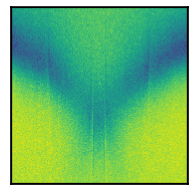

In [7]:
root = '/Users/billystrickland/Documents/code/resonators/devices/fluxonium/paper_figures/data'
sample = 'JS801-4fluxonium@v5-01'
cooldown = '02'
people = 'WMSLJB'
file_num = '868'

# Extract the data from the HDF5 file
magnet, power, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                   channels = ['Qcage - Magnet - Source voltage', 
                                               'Digital Attenuator - Attenuation', 
                                               'VNA - S21'],
                                    get_x = True)

# Process frequency and signal data
freq = np.unique(signal[0])
signal = ff.to_db(abs(signal[1]))
magnet = np.unique(magnet)

# Set flux extent for the plot
flux_extent = [-.71, -.29]

# Create the plot
fig, ax = ff.plot_data(signal[-1].T[::-1], 
            ylabel = '', 
            xlabel = '',
            xlim = [flux_extent[0], flux_extent[-1]],
            ylim = [freq[0]*1e-9, freq[-1]*1e-9],
            figsize = (3,3),
            cbar = False)

# Adjust axis limits and ticks for the inset
plt.ylim(7.37, 7.385)
plt.xlim(-.65, -.35)
plt.yticks([])
plt.xticks([])

# Tidy up the figure layout and save it
fig.tight_layout()
fig.savefig(f'figs_final/fig3a_inset.pdf', format = 'pdf')


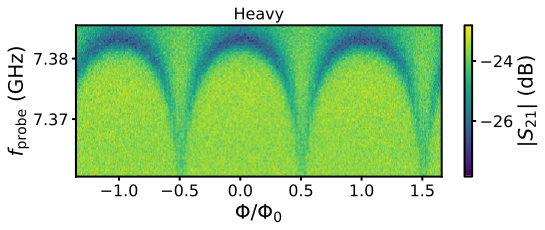

In [3]:
cooldown = '02'
file_num = '915'

# Extract the data from the HDF5 file
magnet, signal = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                   channels = ['Qcage - Magnet - Source voltage',
                               'VNA - S21'],
                             get_x = True)

# Process frequency and signal data
freq = np.unique(signal[0])
signal = ff.to_db(abs(signal[1])) # Convert from V to dB
magnet = np.unique(magnet)

# Set flux extent for the plot
flux_extent = [-1.355, 1.66]

# Create the plot
fig, ax = ff.plot_data(signal.T[::-1], 
            ylabel = '$f_\mathrm{probe}$ (GHz)', 
            xlabel = '$\Phi/\Phi_0$',
            xlim = [-1.355, 1.66], 
            ylim = [freq[0]*1e-9, freq[-1]*1e-9],
            zlabel = '$|S_{21}|$ (dB)',
            figsize = (8,3.5),
                   )

# Customize y-ticks and limits
plt.yticks([7.36, 7.37, 7.38])
plt.ylim(freq[0]*1e-9, freq[-1]*1e-9)

# Set title font
hfont = {'fontname':'DejaVu Sans'}
plt.title(f'Heavy', fontsize = 16, **hfont)

# Tidy up the figure layout and save it
fig.tight_layout()
plt.savefig(f'figs_final/fig3a.pdf', format = 'pdf')


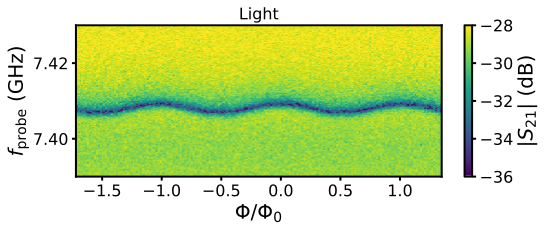

In [4]:
file_num = '037'
cooldown = '01'

# Extract the data from the HDF5 file
magnet, gate, data = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                     channels=['Qcage - Magnet - Source voltage', 
                                               'Gate - Source voltage', 
                                               'VNA - S21'], 
                                     get_x = True)

# Process magnet, gate, frequency, and signal data
magnet = np.unique(magnet)
gate = np.unique(gate)
freq = np.unique(data[0])
data = abs(np.array(data[1]))

# Extract the signal and convert to dB
signal = data[6]
signal = ff.to_db(signal.T[::-1])

# Set flux extent for the plot
flux_extent = [-1.72, 1.35]

# Create the plot
fig, ax = ff.plot_data(signal, 
            xlabel = '$\Phi/\Phi_0$', 
            ylabel = '$f_\mathrm{probe}$ (GHz)', 
            zlabel = '$|S_{21}|$ (dB)',
            xlim = [flux_extent[0], flux_extent[1]], 
            ylim = [freq[0]*1e-9, freq[-1]*1e-9],
            zlim = [-36,-28],
            figsize = (8,3.5))

# Set y-axis limits
plt.ylim(freq[0]*1e-9, freq[-1]*1e-9)

# Set title
plt.title(f'Light', fontsize = 16)

# Tidy up the figure layout and save it
fig.tight_layout()
plt.savefig(f'figs_final/fig3c.pdf', format = 'pdf')


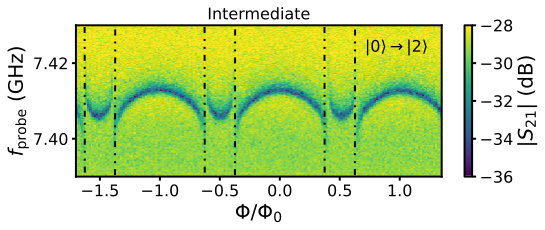

In [8]:
linestyle_tuple = [(0, (2, 6)),
                   (0, (3, 3, 1, 3, 1, 3)),
                   (0, (3, 1, 1, 6)),
                   (0, (1, 3)),
                   (0, (5, 7)),
                   (0, (4, 6))]

def plot_spectrum(flux_extent, El, Ej, Ec, ylim = [4, 6], zero1=True, zero2 = True, zero3 = False,
                 dashes = (0, (2, 6))):
    flux_list = np.linspace(flux_extent[0],flux_extent[-1], 151)
    fl = scq.Fluxonium(
        EJ=Ej,
        EC=Ec,
        EL=El,
        cutoff = 110,
        flux = 0)
    eval_num = 20
    spectrum = fl.get_spectrum_vs_paramvals('flux', flux_list, evals_count=eval_num, subtract_ground=True)
    E_phi = inspect.getmembers(spectrum)[5][1]["energy_table"].T

    f01 = E_phi[1] - E_phi[0]
    f02 = E_phi[2] - E_phi[0]
    f03 = E_phi[3] - E_phi[0]
    if zero1:
        plt.plot(flux_list, f01, color='black', label='$f_{01}$', linestyle=dashes)
    if zero2:
        plt.plot(flux_list, f02, color='black', label='$f_{02}$', linestyle=dashes)

file_num = '037'
month = '02'
day = '22'
cooldown = '01'

# Extract the data from the HDF5 file
magnet, gate, data = ff.extract_data(f'{root}/{sample}-CD{cooldown}-{people}-{file_num}.hdf5',
                                        channels=['Qcage - Magnet - Source voltage', 
                                                  'Gate - Source voltage', 
                                                  'VNA - S21'], 
                                        get_x = True)

# Process magnet, gate, frequency, and signal data
magnet = np.unique(magnet)
gate = np.unique(gate)
freq = np.unique(data[0])
data = abs(np.array(data[1]))

flux_extent = [-1.70, 1.35]

# Extract the signal and convert to dB
signal = data[9]
signal = ff.to_db(signal.T[::-1])

# Create the plot
fig, ax = ff.plot_data(signal, 
            xlabel = '$\Phi/\Phi_0$', 
            ylabel = '$f_\mathrm{probe}$ (GHz)',
            zlabel = '$|S_{21}|$ (dB)',
            xlim = [flux_extent[0], flux_extent[1]],
            ylim = [freq[0]*1e-9, freq[-1]*1e-9],
            zlim = [-36,-28],
            figsize = (8,3.5))

El = 2.8
Ec = .8
Ej = 4

# Plot the spectrum
plot_spectrum(flux_extent, El, Ej, Ec, dashes=linestyle_tuple[1])

# Add annotation
ax.annotate(r"$|0\rangle \rightarrow |2\rangle$", xy=(.71, 7.423), color='k')

# Set the y-axis limits
plt.ylim(freq[0]*1e-9, freq[-1]*1e-9)

# Set the title
plt.title(f'Intermediate', fontsize=16)

# Tidy up the figure layout and save it
fig.tight_layout()
plt.savefig(f'figs_final/fig3b.pdf', format='pdf')
